## Online Credit Card Transactions Fraud Detection

### Understanding the dataset

In [63]:
# Importing the required libraries

import pandas as pd
pd.set_option('precision', 3)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid", {'axes.grid' : False})
from collections import Counter
import scipy.stats
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# Importing the dataset

df = pd.read_csv('CC_FRAUD.csv')
print(f"The size of the dataset is {df.shape}")
df

The size of the dataset is (94682, 20)


,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT


In [4]:
# Displaying the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DOMAIN         94682 non-null  object 
 1   STATE          94682 non-null  object 
 2   ZIPCODE        94682 non-null  int64  
 3   TIME1          94682 non-null  int64  
 4   TIME2          94682 non-null  int64  
 5   VIS1           94682 non-null  int64  
 6   VIS2           94682 non-null  int64  
 7   XRN1           94682 non-null  int64  
 8   XRN2           94682 non-null  int64  
 9   XRN3           94682 non-null  int64  
 10  XRN4           94682 non-null  int64  
 11  XRN5           94682 non-null  int64  
 12  VAR1           94682 non-null  int64  
 13  VAR2           94682 non-null  int64  
 14  VAR3           94682 non-null  float64
 15  VAR4           94682 non-null  int64  
 16  VAR5           94682 non-null  int64  
 17  TRN_AMT        94682 non-null  float64
 18  TOTAL_

In [5]:
# Displaying the description of the numerical features of the dataset

df.describe()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
count,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.00,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000
mean,454.379,13.865,13.876,0.113,0.018,0.547,0.541,0.401,0.02,6.177,2.419,0.426,5.716,13.984,1.376,25.635,25.626
std,228.280,5.263,5.258,0.317,0.134,0.498,0.498,0.490,0.14,102.977,1.004,0.494,31.355,6.517,2.424,14.190,14.199
min,101.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,-258.120,6.000,0.000,0.000,0.000
25%,166.000,10.000,11.000,0.000,0.000,0.000,0.000,0.000,0.00,1.000,2.000,0.000,-12.408,8.000,0.000,12.950,12.950
50%,600.000,14.000,14.000,0.000,0.000,1.000,1.000,0.000,0.00,1.000,3.000,0.000,11.640,12.000,0.000,25.900,25.900
75%,655.000,18.000,18.000,0.000,0.000,1.000,1.000,1.000,0.00,1.000,3.000,1.000,28.784,19.000,2.000,38.850,38.850
max,694.000,23.000,23.000,1.000,1.000,1.000,1.000,1.000,1.00,3278.000,4.000,1.000,65.544,46.000,26.000,95.400,95.400


In [6]:
# Displaying the description of the categorical features of the dataset

df.describe(include = ['object'])

,DOMAIN,STATE,TRN_TYPE
count,94682,94682,94682
unique,9809,53,2
top,TMA.COM,KR,LEGIT
freq,16451,18676,92588


In [7]:
# Checking for the percentage of missing and null values (used to check how empty the dataset is)

df_null = df.isnull().sum() / len(df)*100
total_miss = df_null.sum().round(2)
print(f"Percentage of data missing {total_miss}")
df.isnull().sum()

Percentage of data missing 0.0


DOMAIN           0
STATE            0
ZIPCODE          0
TIME1            0
TIME2            0
VIS1             0
VIS2             0
XRN1             0
XRN2             0
XRN3             0
XRN4             0
XRN5             0
VAR1             0
VAR2             0
VAR3             0
VAR4             0
VAR5             0
TRN_AMT          0
TOTAL_TRN_AMT    0
TRN_TYPE         0
dtype: int64

In [8]:
# Checking for the completeness ratio (used to check how full the dataset is)

non_missing = df.notnull().sum().round(2)
completeness = round(sum(non_missing)/(len(df)*len(df.columns)), 2)
print("Completeness ratio:", completeness)
non_missing

Completeness ratio: 1.0


DOMAIN           94682
STATE            94682
ZIPCODE          94682
TIME1            94682
TIME2            94682
VIS1             94682
VIS2             94682
XRN1             94682
XRN2             94682
XRN3             94682
XRN4             94682
XRN5             94682
VAR1             94682
VAR2             94682
VAR3             94682
VAR4             94682
VAR5             94682
TRN_AMT          94682
TOTAL_TRN_AMT    94682
TRN_TYPE         94682
dtype: int64

In [9]:
# Checking the duplicate rate (used to check the percentage of duplicate values present)

duplicate = df.duplicated().sum()
dup_ratio = round(duplicate/len(df), 2)
print("Duplication rate: ", dup_ratio)

Duplication rate:  0.05


In [10]:
# Checking the skew of the data

skew = pd.DataFrame(df).skew()
normality_skew = round(skew.mean(), 4)
print("How far is my dataset from Normal Distribution:", normality_skew)

How far is my dataset from Normal Distribution: 2.4855


D:\External Application\PythonIDE\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Since the normality skew is positive (>0) we can say that the Mean > Median > Mode in the dataset

Reasons to check skewness: If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance. 

In [11]:
# Checking for the number of unique values per feature

df.nunique()

DOMAIN            9809
STATE               53
ZIPCODE             94
TIME1               24
TIME2               24
VIS1                 2
VIS2                 2
XRN1                 2
XRN2                 2
XRN3                 2
XRN4                 2
XRN5                36
VAR1                 5
VAR2                 2
VAR3             15786
VAR4                38
VAR5                26
TRN_AMT             88
TOTAL_TRN_AMT       88
TRN_TYPE             2
dtype: int64

Here we are going to drop the column 'TOTAL_TRN_AMT' since it is the same as 'TRN_AMT' and so including it in the dataset will give us redundant data, which is unnecessary.

In [12]:
# dropping the excess column

df = df.drop(columns=['TOTAL_TRN_AMT'])
df

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,LEGIT


<AxesSubplot:>

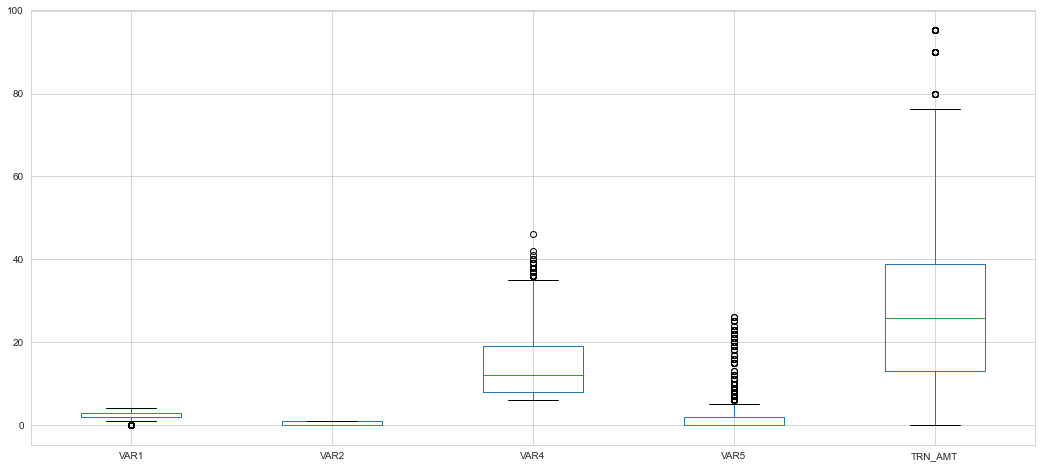

In [13]:
# Plotting the box plots of each feature

col = ['VAR1', 'VAR2', 'VAR4', 'VAR5', 'TRN_AMT']
df.boxplot(column=col, figsize = (18,8))

LEGIT    92588
FRAUD     2094
Name: TRN_TYPE, dtype: int64


<AxesSubplot:xlabel='TRN_TYPE', ylabel='count'>

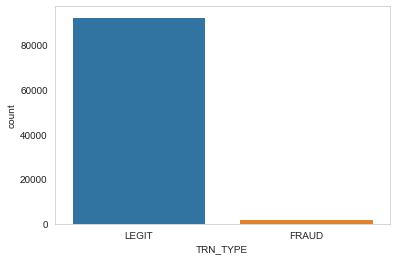

In [14]:
# Plotting the count of each class of the variable 'TRN_TYPE'

print(df['TRN_TYPE'].value_counts())
sns.countplot(x = 'TRN_TYPE', data = df)

In [15]:
# Finding the Shannon Entropy

print(f"The Shannon Entropy is : {scipy.stats.entropy(df['TRN_TYPE'].value_counts())}")

The Shannon Entropy is : 0.10616424951553313


Reasons to check entropy: Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.

The closer the entropy is to 0 the more uncertain the dataset is. Perfect value is 1.

In [16]:
# Transforming the categorical attribute 'TRN_TYPE' to a numerical attribute

print(f"The values of the attribute before transforming the data \n{df['TRN_TYPE']}")
df['TRN_TYPE'].replace(('LEGIT', 'FRAUD'), (1, 0), inplace=True)
print()
print(f"The values of the attribute after transforming the data \n{df['TRN_TYPE']}")

The values of the attribute before transforming the data 
0        LEGIT
1        LEGIT
2        LEGIT
3        LEGIT
4        LEGIT
         ...  
94677    LEGIT
94678    LEGIT
94679    LEGIT
94680    LEGIT
94681    LEGIT
Name: TRN_TYPE, Length: 94682, dtype: object

The values of the attribute after transforming the data 
0        1
1        1
2        1
3        1
4        1
        ..
94677    1
94678    1
94679    1
94680    1
94681    1
Name: TRN_TYPE, Length: 94682, dtype: int64


<AxesSubplot:>

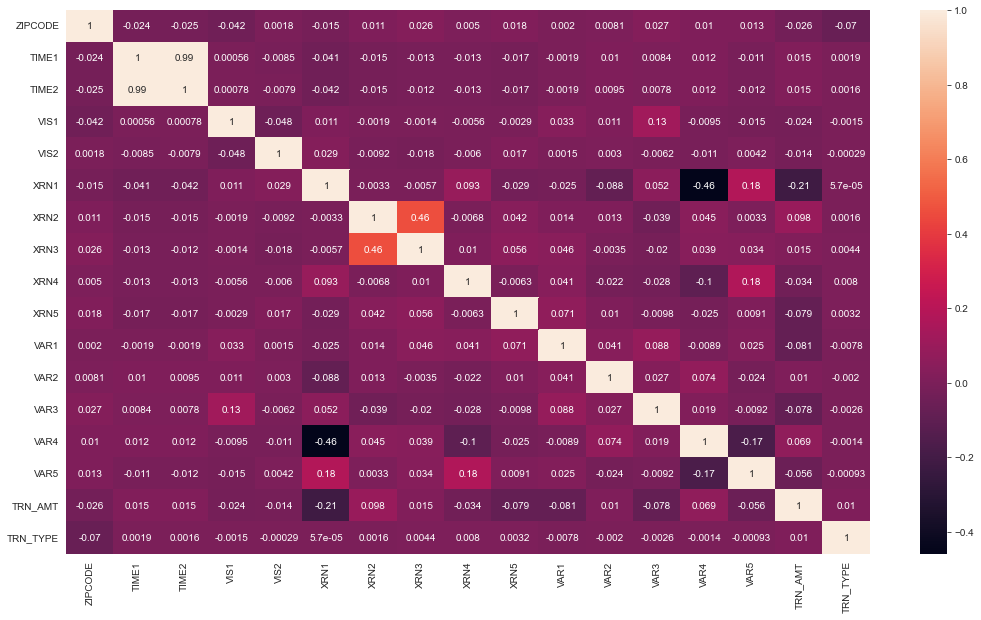

In [17]:
# Displaying the heatmap

fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)

### Preprocessing, transforming and analyzing the transformed data

In [18]:
# Transforming the data by peforming oversampling and undersampling

X = df.drop(columns = ['TRN_TYPE'])
y = df['TRN_TYPE']
print(f"Before sampling: {Counter(y)}")

# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Before sampling: Counter({1: 92588, 0: 2094})
Oversampled: Counter({1: 92588, 0: 46294})
Combined Random Sampling: Counter({1: 57867, 0: 46294})


Since the 2 classes are highly imbalanced (as proved with the help of counterplot of the attribute 'TRN_TYPE', and Shannon Entropy) using it to train the model induces bias into the model and so we tend to transform the data to reduce the bias, the two most popular ways of transforming the data to reduce the bias is under-sampling and over-sampling, but both tend to affect the accuracy of the model.

Here we are using a combination of the two to ensure that we reduce the bias as well as do not affect the accuracy too much.

In [19]:
# Displaying the sampled data

df_sampled = X_combined_sampling
df_sampled['TRN_TYPE'] = y_combined_sampling
print(f"The size of the sampled dataset is {df_sampled.shape}")
df_sampled

The size of the sampled dataset is (104161, 19)


,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TRN_TYPE
0,VUHZRNB.COM,JAO,679,19,19,0,0,0,0,0,0,1,3,0,45.376,19,3,12.95,0
1,TMA.COM,MV,369,14,14,0,0,1,1,1,0,1,2,1,40.400,9,0,11.01,0
2,XOSOP.COM,KR,122,19,19,0,0,0,0,0,0,1,4,1,50.648,21,4,0.00,0
3,BRZWCURTY.NET,KR,120,13,13,0,0,1,0,0,0,1,3,1,39.848,8,0,36.26,0
4,TMA.COM,BR,670,21,21,0,0,0,1,1,0,1,0,0,-9.624,24,0,12.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104156,XOSOP.COM,MO,685,20,21,0,0,0,1,1,0,1,0,1,0.752,8,0,38.85,1
104157,TMA.COM,MV,369,14,14,0,0,1,0,0,0,2,3,1,-16.096,8,0,11.01,1
104158,VUHZRNB.COM,ROK,655,18,18,0,0,0,0,0,0,1,3,1,10.248,18,0,12.95,1
104159,XOSOP.COM,NAO,166,23,23,0,0,0,1,0,0,2,2,0,-13.408,12,1,49.95,1


In [20]:
# Displaying the info of the sampled dataset

df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104161 entries, 0 to 104160
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DOMAIN    104161 non-null  object 
 1   STATE     104161 non-null  object 
 2   ZIPCODE   104161 non-null  int64  
 3   TIME1     104161 non-null  int64  
 4   TIME2     104161 non-null  int64  
 5   VIS1      104161 non-null  int64  
 6   VIS2      104161 non-null  int64  
 7   XRN1      104161 non-null  int64  
 8   XRN2      104161 non-null  int64  
 9   XRN3      104161 non-null  int64  
 10  XRN4      104161 non-null  int64  
 11  XRN5      104161 non-null  int64  
 12  VAR1      104161 non-null  int64  
 13  VAR2      104161 non-null  int64  
 14  VAR3      104161 non-null  float64
 15  VAR4      104161 non-null  int64  
 16  VAR5      104161 non-null  int64  
 17  TRN_AMT   104161 non-null  float64
 18  TRN_TYPE  104161 non-null  int64  
dtypes: float64(2), int64(15), object(2)
memory u

In [21]:
# Checking for the number of unique values per feature

df_sampled.nunique()

DOMAIN       7376
STATE          53
ZIPCODE        94
TIME1          24
TIME2          24
VIS1            2
VIS2            2
XRN1            2
XRN2            2
XRN3            2
XRN4            2
XRN5           34
VAR1            5
VAR2            2
VAR3        14331
VAR4           37
VAR5           25
TRN_AMT        80
TRN_TYPE        2
dtype: int64

In [22]:
# Displaying the description of the numerical features of the dataset

df_sampled.describe()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TRN_TYPE
count,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000
mean,499.537,13.806,13.823,0.115,0.018,0.547,0.540,0.396,0.017,5.394,2.445,0.427,5.895,14.019,1.378,25.267,0.556
std,221.896,5.181,5.172,0.320,0.134,0.498,0.498,0.489,0.129,89.632,0.982,0.495,31.328,6.440,2.396,14.340,0.497
min,101.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-258.120,6.000,0.000,0.000,0.000
25%,356.000,10.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000,0.000,-12.192,9.000,0.000,12.950,0.000
50%,644.000,14.000,14.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,3.000,0.000,11.696,12.000,0.000,20.720,1.000
75%,670.000,18.000,18.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,3.000,1.000,28.776,19.000,2.000,38.850,1.000
max,694.000,23.000,23.000,1.000,1.000,1.000,1.000,1.000,1.000,3278.000,4.000,1.000,65.544,46.000,26.000,95.400,1.000


In [23]:
# Displaying the description of the categorical features of the dataset

df.describe(include = ['object'])

,DOMAIN,STATE
count,94682,94682
unique,9809,53
top,TMA.COM,KR
freq,16451,18676


In [24]:
# Checking the duplicate rate of the sampled data(used to check the percentage of duplicate values present)

duplicate = df_sampled.duplicated().sum()
dup_ratio = round(duplicate/len(df_sampled), 2)
print("Duplication rate: ", dup_ratio)

Duplication rate:  0.45


In [25]:
# Checking the skew of the sampled data

skew = pd.DataFrame(df_sampled).skew()
normality_skew = round(skew.mean(), 4)
print("How far is my dataset from Normal Distribution:", normality_skew)

How far is my dataset from Normal Distribution: 2.5549


D:\External Application\PythonIDE\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Since the normality skew is positive (>0) we can say that the Mean > Median > Mode in the sampled dataset

1    57867
0    46294
Name: TRN_TYPE, dtype: int64


<AxesSubplot:xlabel='TRN_TYPE', ylabel='count'>

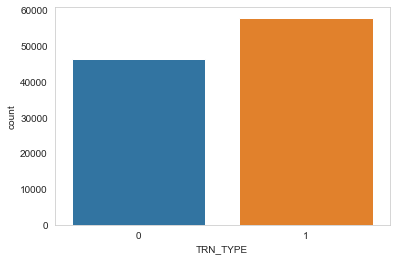

In [26]:
# Displaying the countplot of the column 'TRN_TYPE' of the sampled data

print(df_sampled['TRN_TYPE'].value_counts())
sns.countplot(x = 'TRN_TYPE', data = df_sampled)

<AxesSubplot:>

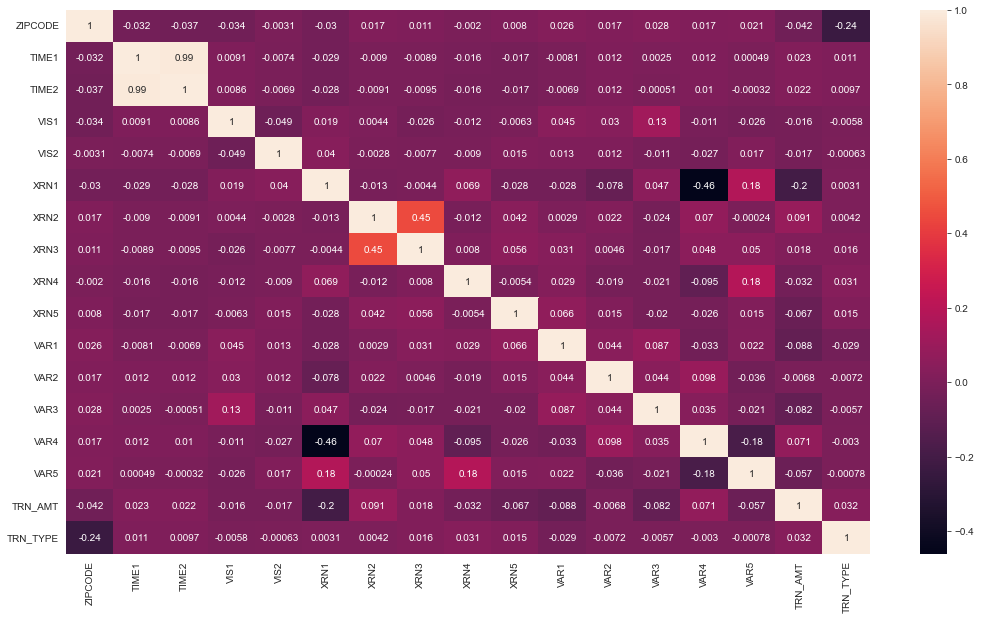

In [27]:
# Displaying the heatmap of the sampled data

fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(df_sampled.corr(), annot=True)

In [28]:
# Displaying the Shannon Entropy of the sampled data

print(f"The Shannon Entropy is : {scipy.stats.entropy(df_sampled['TRN_TYPE'].value_counts())}")

The Shannon Entropy is : 0.6869620526535805


As you can see transforming the data using a combination of under-sampling and over-sampling did improve the quality of our dataset and this fact is proved by the increased Shannon Entropy score from 0.10 initially to 0.68 after the transformation.

### Visualizing the data

In [29]:
# Displaying the count of each unique value for all the attributes

columns = ['VIS1','VIS2', 'XRN1', 'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5']
for i in columns:
    print(f"For the column {i} the count of each value is \n{df_sampled[i].value_counts()}\n")

For the column VIS1 the count of each value is 
0    92141
1    12020
Name: VIS1, dtype: int64

For the column VIS2 the count of each value is 
0    102265
1      1896
Name: VIS2, dtype: int64

For the column XRN1 the count of each value is 
1    56927
0    47234
Name: XRN1, dtype: int64

For the column XRN2 the count of each value is 
1    56273
0    47888
Name: XRN2, dtype: int64

For the column XRN3 the count of each value is 
0    62922
1    41239
Name: XRN3, dtype: int64

For the column XRN4 the count of each value is 
0    102390
1      1771
Name: XRN4, dtype: int64

For the column XRN5 the count of each value is 
1       79755
2       19248
3        3394
4         837
6         221
5         200
200        94
1600       85
7          67
1643       42
3278       40
1434       28
364        27
8          23
373        22
32         14
20         13
977         8
0           7
29          5
39          4
162         4
30          3
130         3
150         3
9           2
77      

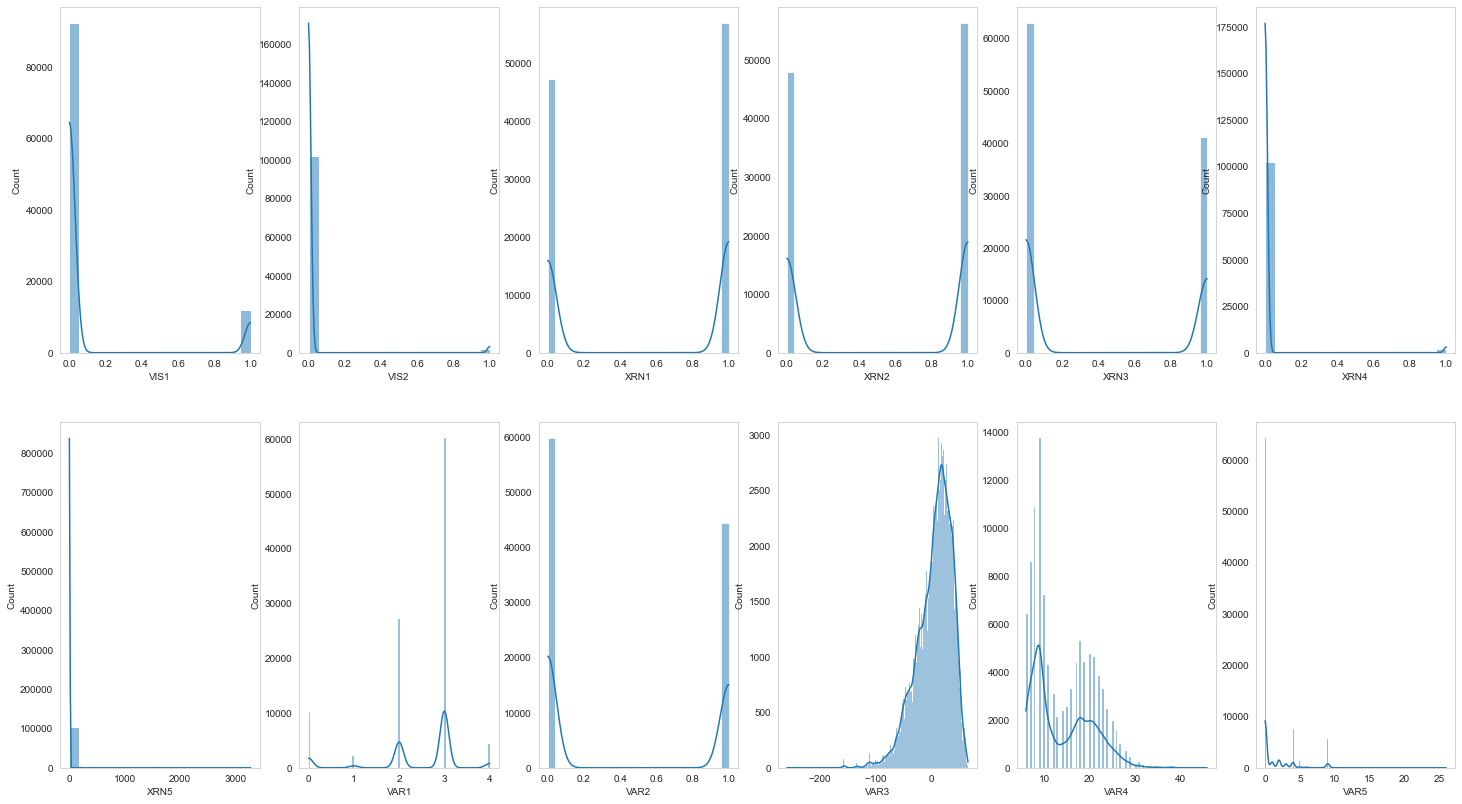

In [30]:
# Plotting the histogram for all the attributes

figure, axis = plt.subplots(2, 6, figsize=(25, 14))
i = 0
for ax in axis[0]:
    sns.histplot(x = columns[i], kde=True, data = df_sampled, ax = ax)
    i+=1
for ax in axis[1]:
    sns.histplot(x = columns[i], kde=True, data = df_sampled, ax = ax)
    i+=1
plt.show()

D:\External Application\PythonIDE\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
D:\External Application\PythonIDE\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


ZIPCODE     -0.852
TIME1       -0.416
TIME2       -0.410
VIS1         2.408
VIS2         7.208
XRN1        -0.187
XRN2        -0.162
XRN3         0.426
XRN4         7.472
XRN5        27.011
VAR1        -1.336
VAR2         0.296
VAR3        -0.965
VAR4         0.584
VAR5         2.191
TRN_AMT      0.389
TRN_TYPE    -0.224
dtype: float64

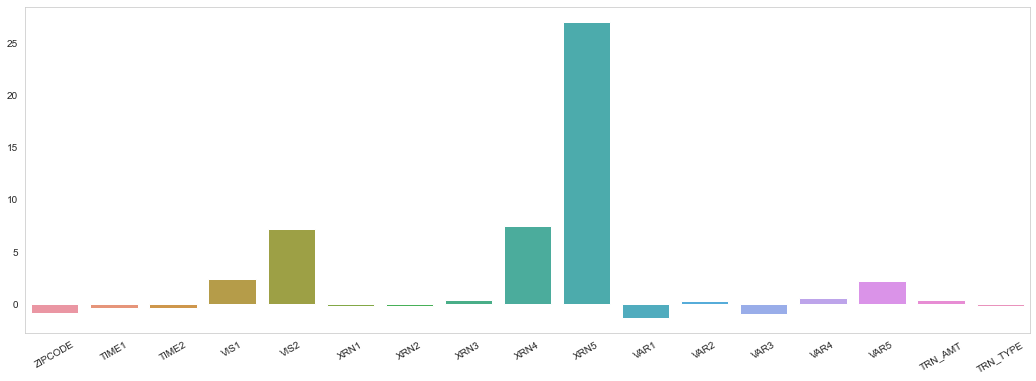

In [31]:
# Plotting the skew plot for all the attributes

plt.subplots(figsize=(18, 6))
columns = df_sampled.columns[2:]
sns.barplot(x=columns, y=df_sampled.skew())
plt.xticks(rotation = 30)
df_sampled.skew()

D:\External Application\PythonIDE\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
D:\External Application\PythonIDE\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


ZIPCODE      -0.965
TIME1        -0.016
TIME2        -0.021
VIS1          3.796
VIS2         49.958
XRN1         -1.965
XRN2         -1.974
XRN3         -1.819
XRN4         53.835
XRN5        825.158
VAR1          1.218
VAR2         -1.912
VAR3          1.396
VAR4         -0.701
VAR5          5.180
TRN_AMT      -0.862
TRN_TYPE     -1.950
dtype: float64

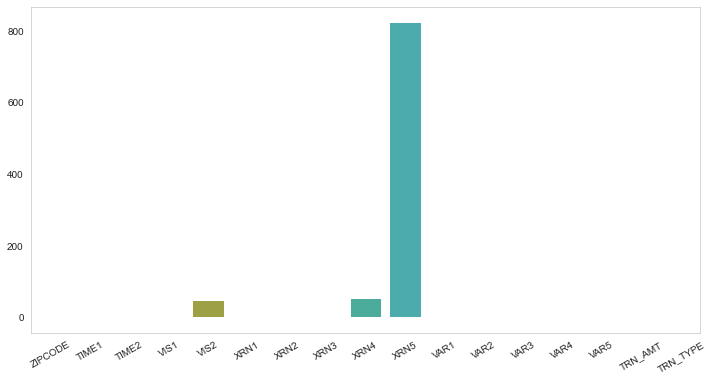

In [32]:
# Plotting the kurtosis plot for all the attributes

plt.subplots(figsize=(12, 6))
columns = df_sampled.columns[2:]
sns.barplot(x=columns, y=df_sampled.kurt())
plt.xticks(rotation = 30)
df_sampled.kurt()

Reason to check kurtosis: Kurtosis identifies whether the tails of a given distribution contain extreme values. In other words, kurtosis determines the heaviness of the distribution tails.

Since the attribute 'XRN5' is heavily dominating in both the skew and kurtosis values, we are removing it to see, clearly, the distribution of skew and kurtosis of the other attributes.

D:\External Application\PythonIDE\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
D:\External Application\PythonIDE\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


ZIPCODE     -0.852
TIME1       -0.416
TIME2       -0.410
VIS1         2.408
VIS2         7.208
XRN1        -0.187
XRN2        -0.162
XRN3         0.426
XRN4         7.472
XRN5        27.011
VAR1        -1.336
VAR2         0.296
VAR3        -0.965
VAR4         0.584
VAR5         2.191
TRN_AMT      0.389
TRN_TYPE    -0.224
dtype: float64

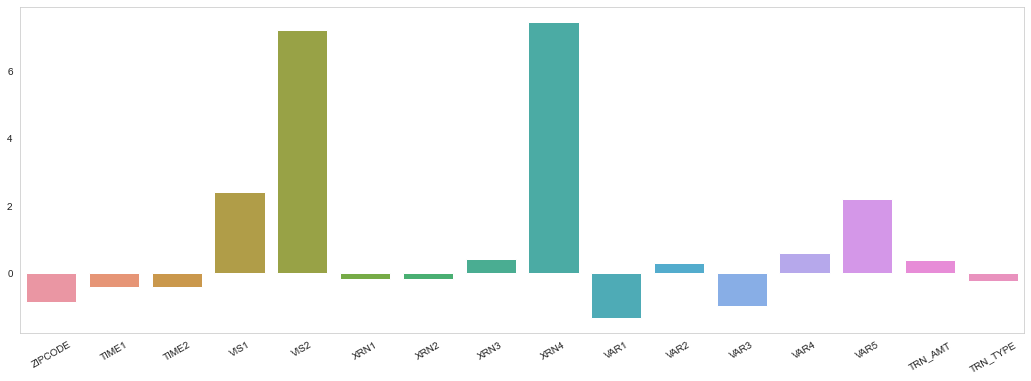

In [33]:
# Plotting the skew of all attributes except 'XRN5'

df_sampled_withoutXRN5 = df_sampled.drop(columns = ['XRN5'])
plt.subplots(figsize=(18, 6))
columns = df_sampled_withoutXRN5.columns[2:]
sns.barplot(x=columns, y=df_sampled_withoutXRN5.skew())
plt.xticks(rotation = 30)
df_sampled.skew()

D:\External Application\PythonIDE\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
D:\External Application\PythonIDE\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


ZIPCODE     -0.965
TIME1       -0.016
TIME2       -0.021
VIS1         3.796
VIS2        49.958
XRN1        -1.965
XRN2        -1.974
XRN3        -1.819
XRN4        53.835
VAR1         1.218
VAR2        -1.912
VAR3         1.396
VAR4        -0.701
VAR5         5.180
TRN_AMT     -0.862
TRN_TYPE    -1.950
dtype: float64

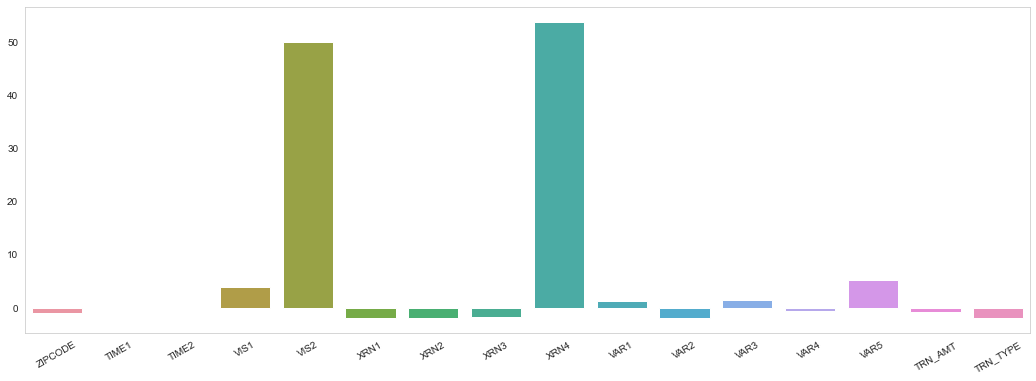

In [34]:
# Plotting the kurtosis of all attributes except 'XRN5'

plt.subplots(figsize=(18, 6))
columns = df_sampled_withoutXRN5.columns[2:]
sns.barplot(x=columns, y=df_sampled_withoutXRN5.kurt())
plt.xticks(rotation = 30)
df_sampled_withoutXRN5.kurt()

### Performing standard scalar to transform the data and randomizing the ordering of the records

In [35]:
# Splitting the depandant and independant attributes into X and y

X, y = df_sampled.drop(columns = ['DOMAIN', 'STATE', 'TRN_TYPE'], axis = 1), df_sampled['TRN_TYPE'] 

In [36]:
# Performing the standard scalar

scaler = StandardScaler()
dfsampled_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
dfsampled_norm

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT
0,0.809,1.003,1.001,-0.361,-0.136,-1.098,-1.084,-0.810,-0.132,-0.049,0.566,-0.863,1.260,0.774,0.677,-0.859
1,-0.588,0.038,0.034,-0.361,-0.136,0.911,0.922,1.235,-0.132,-0.049,-0.453,1.159,1.101,-0.779,-0.575,-0.994
2,-1.701,1.003,1.001,-0.361,-0.136,-1.098,-1.084,-0.810,-0.132,-0.049,1.584,1.159,1.429,1.084,1.094,-1.762
3,-1.710,-0.156,-0.159,-0.361,-0.136,0.911,-1.084,-0.810,-0.132,-0.049,0.566,1.159,1.084,-0.935,-0.575,0.767
4,0.768,1.389,1.388,-0.361,-0.136,-1.098,0.922,1.235,-0.132,-0.049,-2.490,-0.863,-0.495,1.550,-0.575,-0.859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104156,0.836,1.196,1.388,-0.361,-0.136,-1.098,0.922,1.235,-0.132,-0.049,-2.490,1.159,-0.164,-0.935,-0.575,0.947
104157,-0.588,0.038,0.034,-0.361,-0.136,0.911,-1.084,-0.810,-0.132,-0.038,0.566,1.159,-0.702,-0.935,-0.575,-0.994
104158,0.701,0.810,0.808,-0.361,-0.136,-1.098,-1.084,-0.810,-0.132,-0.049,0.566,1.159,0.139,0.618,-0.575,-0.859
104159,-1.503,1.775,1.774,-0.361,-0.136,-1.098,0.922,-0.810,-0.132,-0.038,-0.453,-0.863,-0.616,-0.313,-0.158,1.721


In [37]:
# Spliting the dataset into test and train in the ratio 80:20 while randomizing and shuffling it

X = dfsampled_norm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

### Building the ML model to classify the future transactions

Here we will be training a series of models, and evaluating their results/scores to choose the best model suited for the classification task at hand.

The models that we will be training are as follows:-
1. Logistic Regression
2. Decision Trees
3. Random Forest Classification
4. Naïve Bayes Classification
5. K-Nearest Neighbor (KNN)

#### 1. Logistic Regression

Here we will be performing Logistic regression specifically **Binary Logistic Regression**, since we only want to classify between two variables, whether the transactions are 'LEGIT' or 'FRAUD'.

In [38]:
# Initializing the Logistic Regression class, of sklearn library, with various solvers and using it to predict for X_test

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = dict()
conf_matrix = dict()
for i in solvers:
    log_reg = LogisticRegression(solver=i)
    log_reg.fit(X_train, y_train)
    pred = log_reg.predict(X_test)
    scores[i] = {
        'accuracy' : metrics.accuracy_score(y_test, pred),
        'recall' : metrics.recall_score(y_test, pred),
        'f1' : metrics.f1_score(y_test, pred),
        'logloss' : metrics.log_loss(y_test, pred),
        'AUPRC' : metrics.average_precision_score(y_test, log_reg.predict_proba(X_test)[:,1], average='weighted'),
    }
    conf_matrix[i] = metrics.confusion_matrix(y_test, pred)

Note :- The default solver for the Logistic Regression class, of sklearn library is 'lbfgs'

In [39]:
# Checking the accuracy of our model

for solver, m_score in scores.items():
    print(f"For the model trained using the solver \'{solver}\'")
    for metric, score in m_score.items():
        print(f"The {metric} score is {score:.6f}")
    print()

For the model trained using the solver 'newton-cg'
The accuracy score is 0.628282
The recall score is 0.573601
The f1 score is 0.630287
The logloss score is 12.838792
The AUPRC score is 0.673609

For the model trained using the solver 'lbfgs'
The accuracy score is 0.628282
The recall score is 0.573601
The f1 score is 0.630287
The logloss score is 12.838792
The AUPRC score is 0.673606

For the model trained using the solver 'liblinear'
The accuracy score is 0.628282
The recall score is 0.573601
The f1 score is 0.630287
The logloss score is 12.838792
The AUPRC score is 0.673609

For the model trained using the solver 'sag'
The accuracy score is 0.628282
The recall score is 0.573601
The f1 score is 0.630287
The logloss score is 12.838792
The AUPRC score is 0.673608

For the model trained using the solver 'saga'
The accuracy score is 0.628282
The recall score is 0.573601
The f1 score is 0.630287
The logloss score is 12.838792
The AUPRC score is 0.673609



The confusion matrix for the logistic regression using the solver 'newton-cg' is:


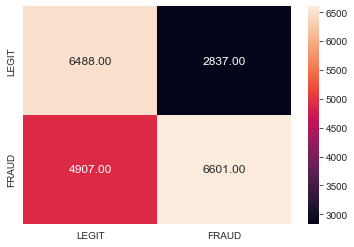

The confusion matrix for the logistic regression using the solver 'lbfgs' is:


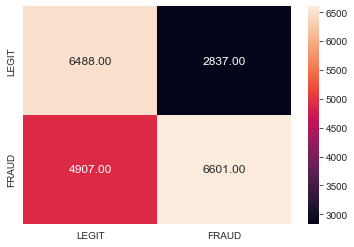

The confusion matrix for the logistic regression using the solver 'liblinear' is:


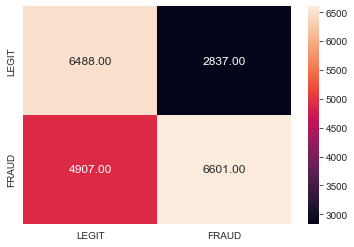

The confusion matrix for the logistic regression using the solver 'sag' is:


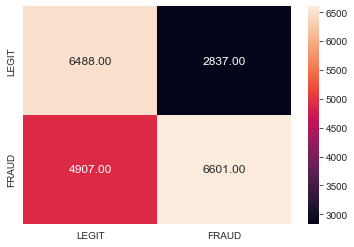

The confusion matrix for the logistic regression using the solver 'saga' is:


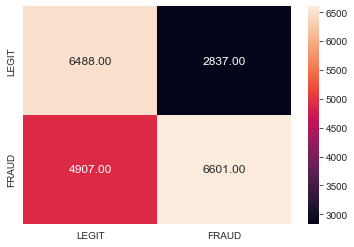

In [40]:
for solver, score in conf_matrix.items():
    print(f'The confusion matrix for the logistic regression using the solver \'{solver}\' is:')
    sns.heatmap(score, annot=True, fmt='.2f', xticklabels=['LEGIT', 'FRAUD'], yticklabels=['LEGIT', 'FRAUD'], annot_kws={"size":12})
    plt.show()

As you can see all the solvers have minute differences in their accuracy score, recall score, f1 score, logloss score, AUPRC score(the area under the precision-recall curve - a useful performance metric for imbalanced data in a problem setting where more preference is given to finding the positive examples) as well as classification scores which means no matter what solver we use the accuracy of the model trained using logistic regression is going to be 63.13% which is not such a highly accurate model, and so we can not use it for our real world purposes.

#### 2. Decision Trees

In [ ]:
Here we will be bulding a model using the Decision Tree Classifier

In [58]:
 # Initializing the Decision Tree class, of sklearn library, using it to predict for X_test

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [44]:
# Checking the accuracy of our model

print(f"The accuracy of the model built using Decision Tree Classifier is {metrics.accuracy_score(y_test, pred):0.5f}")

The accuracy of the model built using Decision Tree Classifier is 0.97931


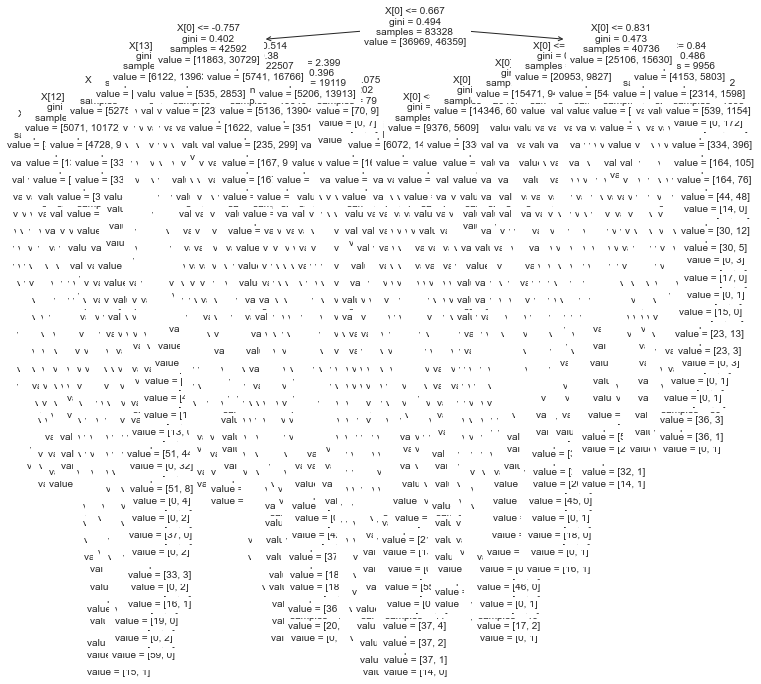

In [59]:
# Plotting the Decision Tree for visualization

plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=10)
plt.show()

#### 3. Random Forest Classification

Here we will be bulding a model using the Random Forest Classifier

In [55]:
# Initializing the Random Forest Classification class, of sklearn library, using it to predict for X_test

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [56]:
# Checking the accuracy of our model

print(f"The accuracy of the model built using Random Forest Classifier is {metrics.accuracy_score(y_test, pred):0.5f}")

The accuracy of the model built using Random Forest Classifier is 0.99448


#### 4. Naïve Bayes Classification

In [61]:
#

nb = GaussianNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)

In [62]:
# Checking the accuracy of our model

print(f"The accuracy of the model built using Naïve Bayes Classifier is {metrics.accuracy_score(y_test, pred):0.5f}")

The accuracy of the model built using Naïve Bayes Classifier is 0.54260


#### 5. K-Nearest Neighbor (KNN)

In [65]:
#

score_neighbours = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score_neighbours.append(metrics.accuracy_score(y_test, pred))

In [69]:
# Checking the accuracy of our model

max_score = 0
for i in range(20):
    print(f"The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = {i+1} is {score_neighbours[i]:0.5f}")
    if max_score < score_neighbours[i]: max_score = score_neighbours[i] 
print(f"\nThe highest accuracy possible using a model built with KNN is {max_score} and it occurs when the number of neighbours are {score_neighbours.index(max_score)+1}")

The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 1 is 0.97413
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 2 is 0.95195
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 3 is 0.95195
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 4 is 0.93256
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 5 is 0.93265
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 6 is 0.91331
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 7 is 0.91336
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 8 is 0.89541
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 9 is 0.89550
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 10 is 0.87669